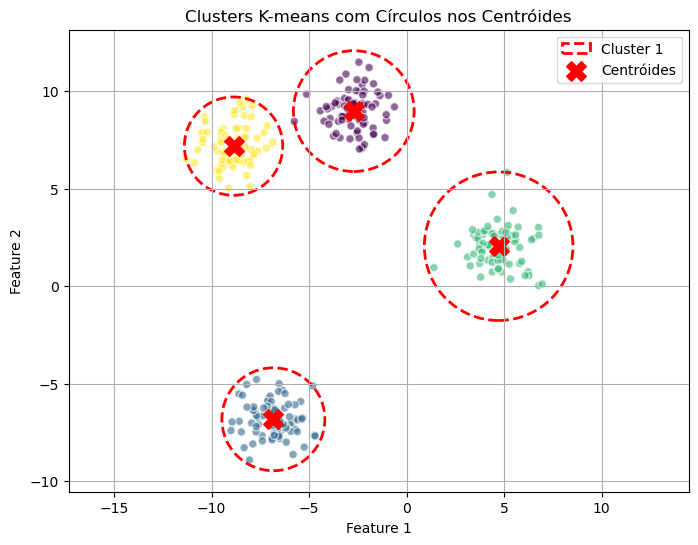

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Gerar dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 2. Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Calcular o raio de cada cluster (distância máxima do centróide)
radii = []
for i in range(len(centroids)):
    # Pontos do cluster i
    cluster_points = X[labels == i]
    if len(cluster_points) == 0:
        radii.append(0)
        continue
    # Distâncias dos pontos ao centróide
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    radii.append(np.max(distances))

# 4. Plotar os dados e os círculos
plt.figure(figsize=(8, 6))

# Plotar os pontos coloridos por cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='w')

# Plotar os centróides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centróides')

# Plotar os círculos ao redor dos centróides
for i, (centroid, radius) in enumerate(zip(centroids, radii)):
    circle = plt.Circle(centroid, radius, color='r', fill=False, linestyle='--', linewidth=2, label=f'Cluster {i+1}' if i == 0 else "")
    plt.gca().add_patch(circle)

plt.title('Clusters K-means com Círculos nos Centróides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Garante que os círculos não fiquem elípticos
plt.show()